In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from pandas import DataFrame
from collections import Counter
# *data pre-processing* using sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
# model selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

# metrics evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

In [2]:
df = pd.read_csv('marketing_campaign.csv', delimiter = ';') 

In [3]:
df['Total_Spend'] = df['MntWines'] + df['MntFruits']+ df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts']+ df['MntGoldProds']

In [15]:
q1 = df.Income.quantile(0.25)          
q3 = df.Income.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr)
upper_bound = q3 +(1.5 * iqr)
df_quantile = df.loc[(df.Income >= lower_bound) & (df.Income <= upper_bound)]

In [5]:
corr = df_quantile.corr()

<AxesSubplot:>

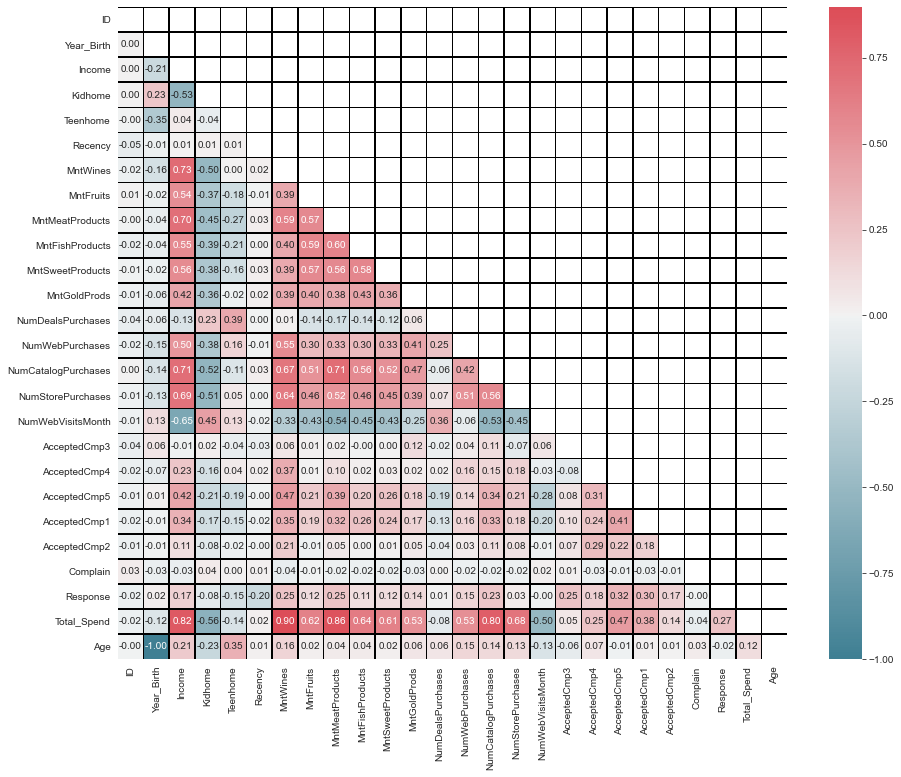

In [40]:
plt.figure(figsize = (15,12))
mask = np.triu(np.ones_like(corr,dtype= bool))
colormap = sb.diverging_palette(220, 10, as_cmap=True)
sb.set_style("whitegrid")
sb.heatmap(corr, linewidth=.5, mask=mask, cmap = colormap, center = 0, annot= True, linewidths=2,  fmt=".2f", linecolor="black")

In [5]:
df.loc[(df['Kidhome'] > 0 ) | ( df['Teenhome'] > 0), 'Children']  = 'Yes'

In [6]:
df.loc[(df['Kidhome'] == 0 ) & ( df['Teenhome'] == 0), 'Children']  = 'No'

In [8]:
df = df.drop(columns= ["Z_CostContact", "Z_Revenue"])

In [7]:
df['Age'] = 2021 - df['Year_Birth'] 

In [9]:
df['Marital'] = df['Marital_Status'].apply(lambda x : "Couple" if x == "Married" else "Couple" if x== "Together" else "Single")   

In [10]:
df['Income_Divide'] = df['Income'].apply(lambda x : "Low" if x <= 30000 else "Low-Medium" if x <= 50000 else "Medium-High" if x <= 75000 else "High" )   

In [11]:
df['Response'] = df['Response'].apply(lambda x : "Yes" if x == 1 else "No")   

In [12]:
df = df.drop(columns= ["Kidhome", "Teenhome"])

In [49]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Spend,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,Yes,1617,64
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,No,27,67
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,No,776,56
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,No,53,37
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,No,422,40


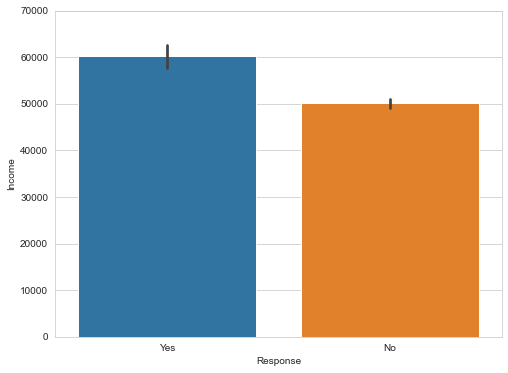

In [56]:

plt.figure(figsize = (8,6))
sb.barplot(x = "Response", y = "Income",data= df_quantile) 
plt.ylabel("Income", size=10)
plt.xlabel("Response", size=10)
plt.ylim(ymax = 70000, ymin = 0);

<Figure size 576x432 with 0 Axes>

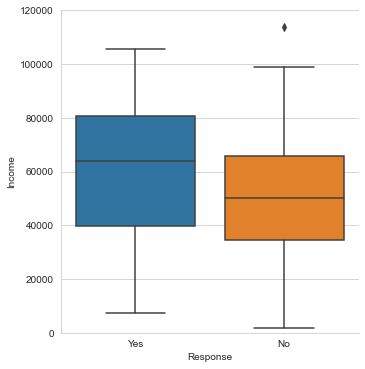

In [62]:

plt.figure(figsize = (8,6))
sb.catplot(x = "Response", y = "Income",data= df_quantile, kind="box") 
plt.ylabel("Income", size=10)
plt.xlabel("Response", size=10)
plt.ylim(ymax = 120000, ymin = 0);

Text(0.5, 0, 'Response')

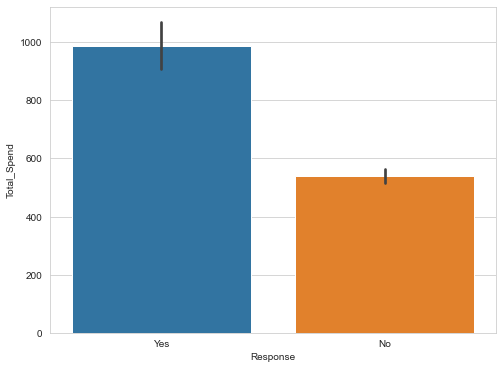

In [83]:

plt.figure(figsize = (8,6))
sb.barplot(x = "Response", y = "Total_Spend",data= df_quantile) 
plt.ylabel("Total_Spend", size=10)
plt.xlabel("Response", size=10)
#plt.ylim(ymax = 70000, ymin = 0);

Text(0.5, 6.799999999999994, 'Response')

<Figure size 576x432 with 0 Axes>

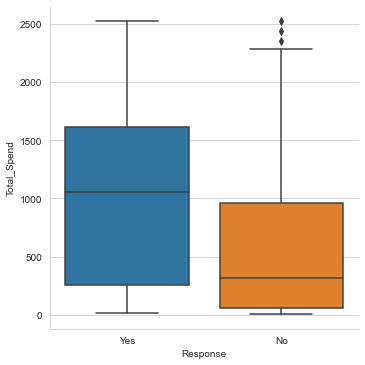

In [85]:

plt.figure(figsize = (8,6))
sb.catplot(x = "Response", y = "Total_Spend",data= df_quantile, kind="box") 
plt.ylabel("Total_Spend", size=10)
plt.xlabel("Response", size=10)
#plt.ylim(ymax = 120000, ymin = 0);

Text(0.5, 0, 'Response')

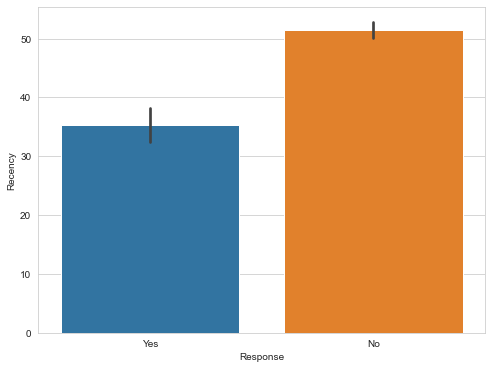

In [58]:
plt.figure(figsize = (8,6))
sb.barplot(x = "Response", y = "Recency",data= df_quantile) 
plt.ylabel("Recency", size=10)
plt.xlabel("Response", size=10)
#plt.ylim(ymax = 70000, ymin = 0);

Text(0.5, 6.799999999999994, 'Response')

<Figure size 576x432 with 0 Axes>

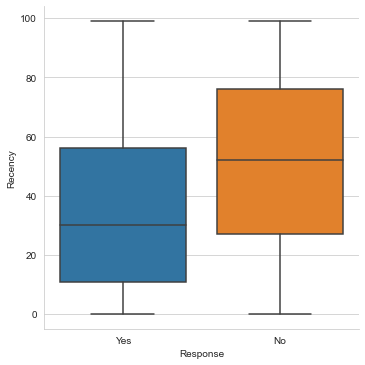

In [65]:
plt.figure(figsize = (8,6))
sb.catplot(x = "Response", y = "Recency",data= df_quantile, kind= "box") 
plt.ylabel("Recency", size=10)
plt.xlabel("Response", size=10)
#plt.ylim(ymax = 70000, ymin = 0);

Text(0.5, 0, 'Response')

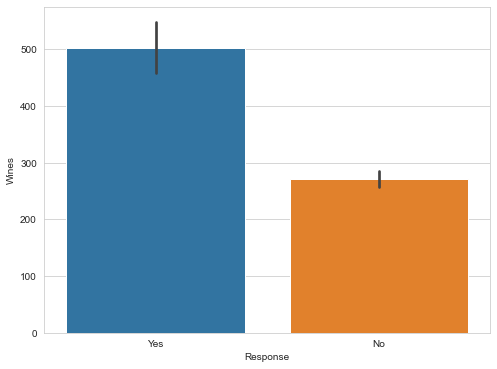

In [67]:
plt.figure(figsize = (8,6))
sb.barplot(x = "Response", y = "MntWines",data= df_quantile) 
plt.ylabel("Wines", size=10)
plt.xlabel("Response", size=10)
#plt.ylim(ymax = 70000, ymin = 0);

Text(0.5, 6.799999999999994, 'Response')

<Figure size 576x432 with 0 Axes>

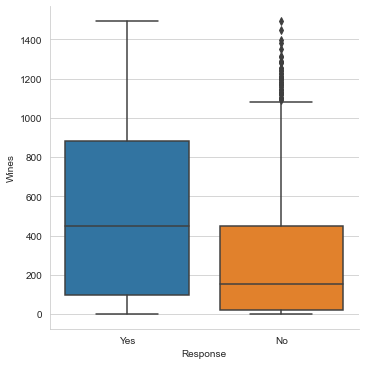

In [66]:
plt.figure(figsize = (8,6))
sb.catplot(x = "Response", y = "MntWines",data= df_quantile, kind= "box") 
plt.ylabel("Wines", size=10)
plt.xlabel("Response", size=10)
#plt.ylim(ymax = 70000, ymin = 0);

In [68]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Total_Spend', 'Age'],
      dtype='object')

Text(0.5, 0, 'Response')

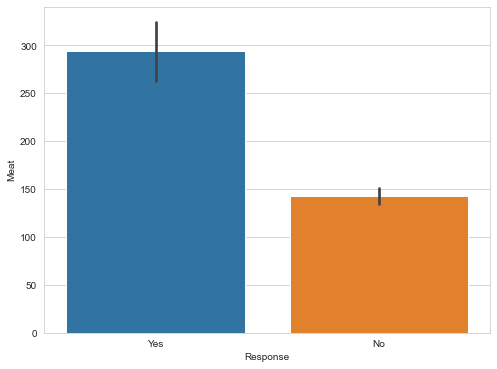

In [69]:
plt.figure(figsize = (8,6))
sb.barplot(x = "Response", y = "MntMeatProducts",data= df_quantile) 
plt.ylabel("Meat", size=10)
plt.xlabel("Response", size=10)
#plt.ylim(ymax = 70000, ymin = 0);

Text(0.5, 6.799999999999994, 'Response')

<Figure size 576x432 with 0 Axes>

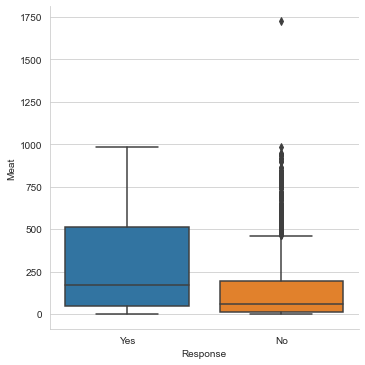

In [71]:
plt.figure(figsize = (8,6))
sb.catplot(x = "Response", y = "MntMeatProducts",data= df_quantile, kind= "box") 
plt.ylabel("Meat", size=10)
plt.xlabel("Response", size=10)
#plt.ylim(ymax = 70000, ymin = 0);

Text(0.5, 0, 'Response')

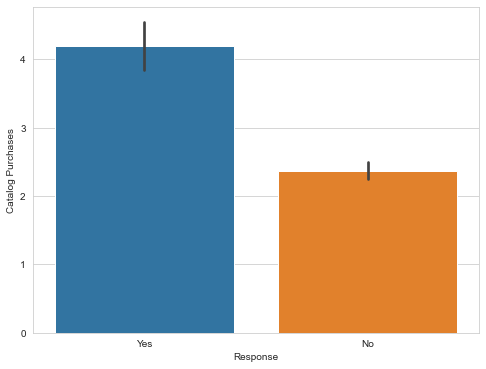

In [72]:
plt.figure(figsize = (8,6))
sb.barplot(x = "Response", y = "NumCatalogPurchases",data= df_quantile) 
plt.ylabel("Catalog Purchases", size=10)
plt.xlabel("Response", size=10)
#plt.ylim(ymax = 70000, ymin = 0);

Text(0.5, 6.799999999999994, 'Response')

<Figure size 576x432 with 0 Axes>

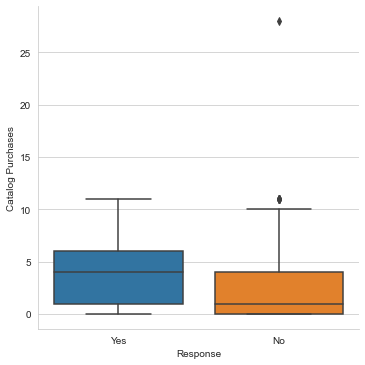

In [73]:
plt.figure(figsize = (8,6))
sb.catplot(x = "Response", y = "NumCatalogPurchases",data= df_quantile, kind= "box") 
plt.ylabel("Catalog Purchases", size=10)
plt.xlabel("Response", size=10)
#plt.ylim(ymax = 70000, ymin = 0);

In [75]:
df_buys_yes = df_quantile[df_quantile.Response == "Yes" ]

In [76]:
df_buys_yes["AcceptedCmp1"].value_counts()

0    254
1     79
Name: AcceptedCmp1, dtype: int64

In [77]:
df_buys_yes["AcceptedCmp3"].value_counts()

0    256
1     77
Name: AcceptedCmp3, dtype: int64

In [78]:
df_buys_yes["AcceptedCmp5"].value_counts()

0    242
1     91
Name: AcceptedCmp5, dtype: int64

# Model

In [57]:
df_quantile_sorted = df_quantile.sort_values(by = "Response")

In [58]:
df_quantile_sorted.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Total_Spend', 'Age'],
      dtype='object')

In [59]:
X =  df_quantile_sorted.drop(['ID', 'Year_Birth', 'Education', 'Marital_Status','Kidhome','Teenhome', 'Dt_Customer', 'MntFruits', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response','NumStorePurchases', 'NumWebVisitsMonth',
'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', "Age"], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2208 entries, 1120 to 2239
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Income               2208 non-null   float64
 1   Recency              2208 non-null   int64  
 2   MntWines             2208 non-null   int64  
 3   MntMeatProducts      2208 non-null   int64  
 4   NumCatalogPurchases  2208 non-null   int64  
 5   Total_Spend          2208 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 120.8 KB


In [60]:
le = LabelEncoder()
df_quantile_sorted['Response'] = le.fit_transform(df_quantile_sorted['Response'])
df_quantile_sorted['Response'].value_counts()

0    1875
1     333
Name: Response, dtype: int64

In [61]:
y = df_quantile_sorted['Response']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [94]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [63]:
rus = RandomUnderSampler(random_state = 1)
X_train, y_train = rus.fit_resample(X_train, y_train)

In [64]:
pd_y = pd.Series(y_train)
pd_y.value_counts()

0    268
1    268
Name: Response, dtype: int64

In [65]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)
X_test

array([[-1.32176778, -1.00968348, -1.0078282 , -0.81818331, -1.10117688,
        -1.10706294],
       [ 0.13268677,  1.1567027 ,  0.80240949, -0.57015715,  0.90754963,
         0.22173976],
       [-1.54065109,  0.81820486, -0.83205149,  0.05790909, -0.43160137,
        -0.27543132],
       ...,
       [-0.82646426,  0.24275853, -0.90551041, -0.68616939, -1.10117688,
        -0.97448399],
       [-0.86666064,  0.10735939, -0.87665155, -0.78217951, -1.10117688,
        -1.02721425],
       [ 1.02023216,  1.39365118,  0.05994968, -0.41014027,  1.24233738,
         0.05450949]])

In [66]:
X_train.shape

(536, 6)

In [67]:
rfc = RandomForestClassifier(random_state=1)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [68]:
print(accuracy_score(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

0.7669683257918553
[[288  89]
 [ 14  51]]


In [26]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.95      0.76      0.85       377
           1       0.36      0.78      0.50        65

    accuracy                           0.77       442
   macro avg       0.66      0.77      0.67       442
weighted avg       0.87      0.77      0.80       442



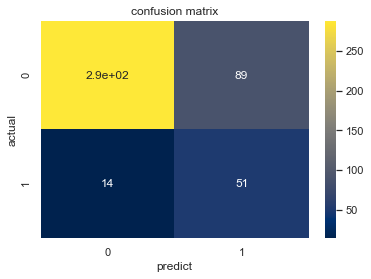

In [105]:
sb.set()
fig = plt.figure()
ax = fig.add_subplot(111)
conf_mat = confusion_matrix(y_test, pred_rfc)
sb.heatmap(conf_mat,annot=True, cmap='cividis') #cmap= magma,cividis
ax.set_title('confusion matrix') 
ax.set_xlabel('predict') 
ax.set_ylabel('actual') 
plt.show()

## Feature Importance

In [16]:
df_quantile_sorted = df_quantile.sort_values(by = "Response")

In [17]:
df_quantile_sorted.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Total_Spend', 'Children', 'Age', 'Marital',
       'Income_Divide'],
      dtype='object')

In [75]:
#X =  df_quantile_sorted
X =  df_quantile_sorted.drop(['Dt_Customer','ID',  'Education', 'Marital_Status', 'Complain', 'Response','NumStorePurchases', 'NumWebVisitsMonth',
'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', "Children", "Marital", "Income_Divide"], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2208 entries, 1120 to 2239
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2208 non-null   int64  
 1   Income               2208 non-null   float64
 2   Recency              2208 non-null   int64  
 3   MntWines             2208 non-null   int64  
 4   MntFruits            2208 non-null   int64  
 5   MntMeatProducts      2208 non-null   int64  
 6   MntFishProducts      2208 non-null   int64  
 7   MntSweetProducts     2208 non-null   int64  
 8   MntGoldProds         2208 non-null   int64  
 9   NumDealsPurchases    2208 non-null   int64  
 10  NumWebPurchases      2208 non-null   int64  
 11  NumCatalogPurchases  2208 non-null   int64  
 12  Total_Spend          2208 non-null   int64  
 13  Age                  2208 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 258.8 KB


In [76]:
le = LabelEncoder()
df_quantile_sorted['Response'] = le.fit_transform(df_quantile_sorted['Response'])
df_quantile_sorted['Response'].value_counts()

0    1875
1     333
Name: Response, dtype: int64

In [78]:
y = df_quantile_sorted['Response']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [80]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [81]:
rus = RandomUnderSampler(random_state = 1)
X_train, y_train = rus.fit_resample(X_train, y_train)

In [82]:
pd_y = pd.Series(y_train)
pd_y.value_counts()

0    268
1    268
Name: Response, dtype: int64

In [83]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)
X_test

array([[ 0.2856154 , -1.32176778, -1.00968348, ..., -1.10117688,
        -1.10706294, -0.2856154 ],
       [-0.45000056,  0.13268677,  1.1567027 , ...,  0.90754963,
         0.22173976,  0.45000056],
       [-1.26735162, -1.54065109,  0.81820486, ..., -0.43160137,
        -0.27543132,  1.26735162],
       ...,
       [ 0.20388029, -0.82646426,  0.24275853, ..., -1.10117688,
        -0.97448399, -0.20388029],
       [-1.18561651, -0.86666064,  0.10735939, ..., -1.10117688,
        -1.02721425,  1.18561651],
       [-1.0221463 ,  1.02023216,  1.39365118, ...,  1.24233738,
         0.05450949,  1.0221463 ]])

In [84]:
X_train.shape

(536, 14)

In [85]:
rfc = RandomForestClassifier(random_state=1)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

Feature: 0, Score: 0.05490
Feature: 1, Score: 0.10458
Feature: 2, Score: 0.11369
Feature: 3, Score: 0.09805
Feature: 4, Score: 0.05528
Feature: 5, Score: 0.08664
Feature: 6, Score: 0.05690
Feature: 7, Score: 0.05785
Feature: 8, Score: 0.07653
Feature: 9, Score: 0.03927
Feature: 10, Score: 0.04131
Feature: 11, Score: 0.04913
Feature: 12, Score: 0.11239
Feature: 13, Score: 0.05348


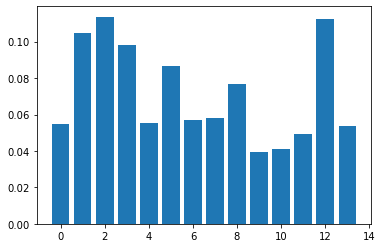

In [86]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### KNN

In [73]:
df_quantile['Response'] = df_quantile['Response'].astype('category')

<ipython-input-73-abd46d578893>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantile['Response'] = df_quantile['Response'].astype('category')


In [76]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Total_Spend', 'Age'],
      dtype='object')

In [82]:
df_quantile_model= df_quantile[['Income', 'Recency', "MntWines", 'MntMeatProducts', 'NumCatalogPurchases', 'Total_Spend',"Response"]]

In [83]:
df_quantile_model= pd.get_dummies(df_quantile_model, columns=['Response'])

In [86]:
df_quantile_model

,Income,Recency,MntWines,MntMeatProducts,NumCatalogPurchases,Total_Spend,Response_0,Response_1
0,58138.0,58,635,546,10,1617,0,1
1,46344.0,38,11,6,1,27,1,0
2,71613.0,26,426,127,2,776,1,0
3,26646.0,26,11,20,0,53,1,0
4,58293.0,94,173,118,3,422,1,0
...,...,...,...,...,...,...,...,...
2235,61223.0,46,709,182,3,1341,1,0
2236,64014.0,56,406,30,2,444,1,0
2237,56981.0,91,908,217,3,1241,1,0
2238,69245.0,8,428,214,5,843,1,0


In [84]:
X = df_quantile_model.drop(columns = ['Response'])
y = df_quantile_model['Response']

KeyError: "['Response'] not found in axis"

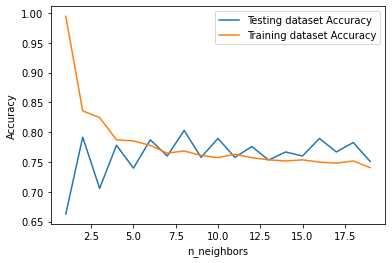

In [70]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1, 20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
      
    # Compute traning and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
  
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [71]:
lr = LinearRegression()

#scores = cross_val_score(lr, X, y, cv=10, scoring= 'r2')

scores = - cross_val_score(lr, X, y, cv=10, scoring= 'neg_mean_absolute_error')

scores.mean()

0.2568709019189086

In [32]:
rf = RandomForestRegressor()
#scores = cross_val_score(lr, X, y, cv=10, scoring= 'r2')
scores = - cross_val_score(rf, X, y, cv=10, scoring= 'neg_mean_absolute_error')
scores.mean()

0.22635714932126696

In [36]:
rmse = mean_squared_error(y_test, y_pred)
rmse

0.16608496328213007

In [34]:
mean_absolute_error(y_test, y_pred)

0.29233754523237476

In [37]:
X = np.where(X<0, 0, X) 
X.min()

0.0

In [53]:
y_pred = np.where(y_pred<0, 0, y_pred) 
y_pred.min()

0.0

In [54]:
y_pred

array([4.25357425e-01, 7.31447841e-02, 7.44444087e-01, 1.35232927e-01,
       8.14277181e-02, 0.00000000e+00, 3.84531257e-02, 4.53052265e-01,
       6.01650652e-01, 6.82063271e-01, 2.99032246e-02, 4.78194319e-02,
       1.30205596e-01, 7.58805500e-01, 8.32119885e-01, 1.76861995e-02,
       0.00000000e+00, 7.96534978e-03, 0.00000000e+00, 4.01963435e-02,
       3.04133515e-01, 4.00029887e-01, 0.00000000e+00, 4.72590035e-01,
       6.53766770e-01, 5.67508143e-02, 0.00000000e+00, 1.38283234e-01,
       3.76842870e-02, 1.90642529e-01, 7.56964153e-01, 0.00000000e+00,
       2.99957351e-01, 8.09975124e-03, 1.45969756e-01, 9.28200229e-02,
       0.00000000e+00, 5.50268923e-02, 5.41217498e-01, 4.67140444e-01,
       5.45771495e-01, 1.06565284e-01, 8.52132967e-01, 3.85535831e-02,
       4.33403150e-01, 0.00000000e+00, 2.81478278e-01, 1.36415314e-01,
       4.64843707e-01, 6.85342275e-01, 5.92055098e-01, 5.48848502e-02,
       4.54365816e-02, 5.90550754e-01, 4.64463566e-01, 5.26833114e-01,
      

In [49]:
y_test = np.where(y_test<0, 0, y_test) 
y_test.min()

0

In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error

models=[RandomForestRegressor(max_features= 'auto', n_estimators= 100, n_jobs= -1),AdaBoostRegressor(),BaggingRegressor(),SVR(),KNeighborsRegressor()]
model_names=['RandomForestRegressor','AdaBoostRegressor','BaggingRegressor','SVR','KNeighborsRegressor']
rmsle=[]
rmse = []
d1= {}
d2 = {}
for model in range (len(models)):
    clf=models[model]
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    #rmsle.append(np.sqrt(mean_squared_log_error(y_pred,y_test)))
    rmse.append(np.sqrt(mean_squared_error(y_pred,y_test, squared=False)))

d1={'Modelling Algo':model_names,'RMSLE':rmsle}

d2={'Modelling Algo':model_names,'RMSE':rmse}

rmsle_frame=pd.DataFrame(d1)
#rmsle_frame

rmse_frame=pd.DataFrame(d2)
#rmse_frame

sb.catplot(y='Modelling Algo',x='RMSLE',data=rmsle_frame,kind='bar',height=5,aspect=2);

ValueError: arrays must all be same length